In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [457]:
data=pd.read_csv('/content/EICHERMOT.csv')

In [458]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,NaN,NaN,NaN
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,NaN,NaN,NaN
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,NaN,NaN,NaN
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,NaN,NaN,NaN
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [459]:
data.shape

(5301, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [460]:
data['Date']=pd.to_datetime(data['Date'])

In [461]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,NaN,NaN,NaN
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,NaN,NaN,NaN
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,NaN,NaN,NaN
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,NaN,NaN,NaN
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,NaN,NaN,NaN


In [462]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [463]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [464]:
df=data.loc[:,'Prev Close':]

In [465]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,NaN,NaN,NaN,1.770833,8.075221
1,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,NaN,NaN,NaN,5.184447,5.220061
2,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,NaN,NaN,NaN,8.814887,8.073930
3,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,NaN,NaN,NaN,4.712042,8.010801
4,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,NaN,NaN,NaN,7.820300,7.750000


In [466]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [467]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3714,2014-12-02,EICHERMOT,EQ,14520.85,14537.95,14569.00,14300.0,14350.05,14359.05,14385.62,39885,5.737703e+13,9325.0,22487.0,0.5638,1.881119,-1.114260
3715,2014-12-03,EICHERMOT,EQ,14359.05,14601.60,15373.10,14601.6,15360.00,15235.55,14999.17,123520,1.852698e+14,21337.0,34554.0,0.2797,5.283668,6.104164
3716,2014-12-04,EICHERMOT,EQ,15235.55,15548.00,15785.00,15210.0,15420.00,15432.00,15462.77,111153,1.718733e+14,22997.0,34160.0,0.3073,3.780408,1.289418
3717,2014-12-05,EICHERMOT,EQ,15432.00,15450.00,15619.95,15140.0,15275.00,15213.50,15413.03,69545,1.071899e+14,13466.0,34964.0,0.5028,3.170079,-1.415889
3718,2014-12-08,EICHERMOT,EQ,15213.50,15395.00,15427.45,14870.0,14955.00,14952.30,15089.98,43692,6.593113e+13,11414.0,20164.0,0.4615,3.748823,-1.716896


In [468]:
df=new_df.loc[:,'Prev Close':]

In [469]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.997721,0.997147,0.997053,0.996372,0.996429,0.997133,-0.587449,-0.305533,-0.515306,-0.600459,0.439192,-0.166077,-0.030727
Open,0.997721,1.000000,0.999228,0.999271,0.998522,0.998581,0.999274,-0.616379,-0.325041,-0.541655,-0.619951,0.440259,-0.175860,0.019856
High,0.997147,0.999228,1.000000,0.998990,0.999335,0.999378,0.999670,-0.615943,-0.312897,-0.532923,-0.619547,0.434056,-0.153092,0.036078
Low,0.997053,0.999271,0.998990,1.000000,0.999350,0.999403,0.999706,-0.615361,-0.330221,-0.546136,-0.619740,0.442116,-0.195073,0.036861
Last,0.996372,0.998522,0.999335,0.999350,1.000000,0.999968,0.999731,-0.615444,-0.320421,-0.538772,-0.619886,0.436388,-0.174658,0.051771
Close,0.996429,0.998581,0.999378,0.999403,0.999968,1.000000,0.999780,-0.615483,-0.320025,-0.538723,-0.619671,0.436516,-0.174690,0.051452
VWAP,0.997133,0.999274,0.999670,0.999706,0.999731,0.999780,1.000000,-0.615650,-0.321444,-0.539381,-0.620009,0.437192,-0.175082,0.040592
Volume,-0.587449,-0.616379,-0.615943,-0.615361,-0.615444,-0.615483,-0.615650,1.000000,0.645046,0.849471,0.840398,-0.312283,0.212659,-0.297569
Turnover,-0.305533,-0.325041,-0.312897,-0.330221,-0.320421,-0.320025,-0.321444,0.645046,1.000000,0.868195,0.579997,-0.377273,0.489092,-0.135916
Trades,-0.515306,-0.541655,-0.532923,-0.546136,-0.538772,-0.538723,-0.539381,0.849471,0.868195,1.000000,0.703325,-0.463888,0.473477,-0.246238


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.4734) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.212).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.489).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.232) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(-0.135) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(-0.246) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.123) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.011)suggest a positive relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [470]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [471]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [472]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [473]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,20394.132329,35591.432145,0.574677,1.770833,8.075221
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,20394.132329,35591.432145,0.574677,5.184447,5.220061
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,20394.132329,35591.432145,0.574677,8.814887,8.073930
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,20394.132329,35591.432145,0.574677,4.712042,8.010801
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,20394.132329,35591.432145,0.574677,7.820300,7.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,2021-04-26,EICHERMOT,EQ,2317.30,2329.50,2376.15,2329.50,2366.55,2369.85,2359.51,1330072,3.138312e+14,40310.000000,717589.000000,0.539500,2.002576,2.267725
5297,2021-04-27,EICHERMOT,EQ,2369.85,2369.85,2407.00,2366.70,2407.00,2400.10,2388.53,523800,1.251111e+14,32757.000000,167254.000000,0.319300,1.702793,1.276452
5298,2021-04-28,EICHERMOT,EQ,2400.10,2428.00,2540.00,2410.15,2516.00,2521.20,2497.26,1681975,4.200329e+14,81182.000000,282675.000000,0.168100,5.387631,5.045623
5299,2021-04-29,EICHERMOT,EQ,2521.20,2526.00,2547.25,2452.90,2463.00,2462.90,2492.68,1170842,2.918529e+14,64817.000000,331074.000000,0.282800,3.846467,-2.312391


In [474]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [475]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


      Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0  EICHERMOT         0.132217                    0.49368             4.336793   

    Mean Volume  Mean Deliverable (%)    Mean VWAP  Overall Score  
0  96284.295793              0.574677  6754.185869    6904.128589  


In [476]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,20394.132329,35591.432145,0.574677,1.770833,8.075221
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,20394.132329,35591.432145,0.574677,5.184447,5.220061
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,20394.132329,35591.432145,0.574677,8.814887,8.073930
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,20394.132329,35591.432145,0.574677,4.712042,8.010801
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,20394.132329,35591.432145,0.574677,7.820300,7.750000


In [477]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,20394.132329,35591.432145,0.574677,1.770833,8.075221
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,20394.132329,35591.432145,0.574677,5.184447,5.220061
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,20394.132329,35591.432145,0.574677,8.814887,8.073930
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,20394.132329,35591.432145,0.574677,4.712042,8.010801
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,20394.132329,35591.432145,0.574677,7.820300,7.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,2021-04-26,EICHERMOT,EQ,2317.30,2329.50,2376.15,2329.50,2366.55,2369.85,2359.51,1330072,3.138312e+14,40310.000000,717589.000000,0.539500,2.002576,2.267725
5297,2021-04-27,EICHERMOT,EQ,2369.85,2369.85,2407.00,2366.70,2407.00,2400.10,2388.53,523800,1.251111e+14,32757.000000,167254.000000,0.319300,1.702793,1.276452
5298,2021-04-28,EICHERMOT,EQ,2400.10,2428.00,2540.00,2410.15,2516.00,2521.20,2497.26,1681975,4.200329e+14,81182.000000,282675.000000,0.168100,5.387631,5.045623
5299,2021-04-29,EICHERMOT,EQ,2521.20,2526.00,2547.25,2452.90,2463.00,2462.90,2492.68,1170842,2.918529e+14,64817.000000,331074.000000,0.282800,3.846467,-2.312391


 Feature engineer and build machine learning solutions for the business
 Requirements

In [478]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [479]:
data['Volume_Change'] = data['Volume'].pct_change()


In [480]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [481]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [482]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,...,20394.132329,35591.432145,0.574677,1.770833,8.075221,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,...,20394.132329,35591.432145,0.574677,5.184447,5.220061,0.052201,10.975610,NaN,NaN,NaN
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,...,20394.132329,35591.432145,0.574677,8.814887,8.073930,0.137155,-0.026477,NaN,NaN,NaN
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,...,20394.132329,35591.432145,0.574677,4.712042,8.010801,0.228250,1.221757,NaN,NaN,NaN
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,...,20394.132329,35591.432145,0.574677,7.820300,7.750000,0.323439,0.087571,NaN,NaN,NaN


In [483]:
data['Target_Close'] = data['Close'].shift(-1)


In [484]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,...,35591.432145,0.574677,1.770833,8.075221,0.000000,NaN,NaN,NaN,NaN,51.40
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,...,35591.432145,0.574677,5.184447,5.220061,0.052201,10.975610,NaN,NaN,NaN,55.55
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,...,35591.432145,0.574677,8.814887,8.073930,0.137155,-0.026477,NaN,NaN,NaN,60.00
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,...,35591.432145,0.574677,4.712042,8.010801,0.228250,1.221757,NaN,NaN,NaN,64.65
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,...,35591.432145,0.574677,7.820300,7.750000,0.323439,0.087571,NaN,NaN,NaN,65.50


Mean Squared Error: 78505.49076225619
R2 Score: 0.9991763660961481


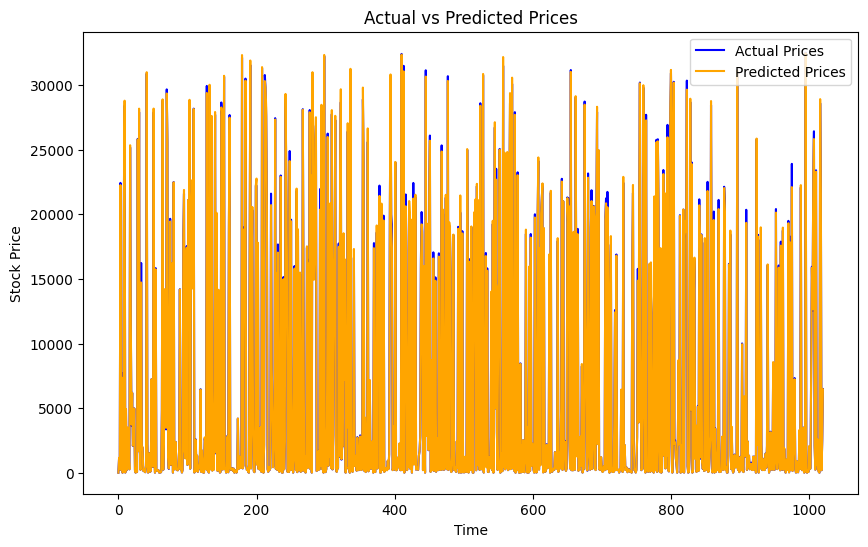

In [485]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [486]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,EICHERMOT,EQ,22.20,21.95,23.00,21.10,23.00,22.95,22.18,...,9.004739,3.378378,-0.530194,3.546667,24.869,37.28050,0.693105,23.45,0.033784,22.9250
200,2000-10-20,EICHERMOT,EQ,22.95,23.20,23.75,22.50,23.75,23.45,23.22,...,5.555556,2.178649,-0.519959,-0.424853,24.789,37.15350,0.702903,22.90,0.021786,22.9475
201,2000-10-23,EICHERMOT,EQ,23.45,22.15,23.80,22.15,22.90,22.90,23.15,...,7.449210,-2.345416,-0.531218,-0.365838,24.687,37.01100,0.691199,22.60,-0.023454,22.9725
202,2000-10-24,EICHERMOT,EQ,22.90,23.50,23.50,22.35,22.35,22.60,22.87,...,5.145414,-1.310044,-0.537359,0.771357,24.579,36.84625,0.696212,24.15,-0.013100,22.9550
203,2000-10-25,EICHERMOT,EQ,22.60,23.50,24.40,23.05,24.40,24.15,23.92,...,5.856833,6.858407,-0.505629,1.612766,24.508,36.66700,0.744537,24.30,0.068584,23.0025


In [487]:
features=['Date','Close']

In [488]:
my_data=data[features]

In [489]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-489-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [490]:
my_data

,Date,Close
199,2000-10-19,22.95
200,2000-10-20,23.45
201,2000-10-23,22.90
202,2000-10-24,22.60
203,2000-10-25,24.15
...,...,...
5295,2021-04-23,2317.30
5296,2021-04-26,2369.85
5297,2021-04-27,2400.10
5298,2021-04-28,2521.20


In [491]:
my_data.index=my_data['Date']

In [492]:
del my_data['Date']

<Axes: xlabel='Date'>

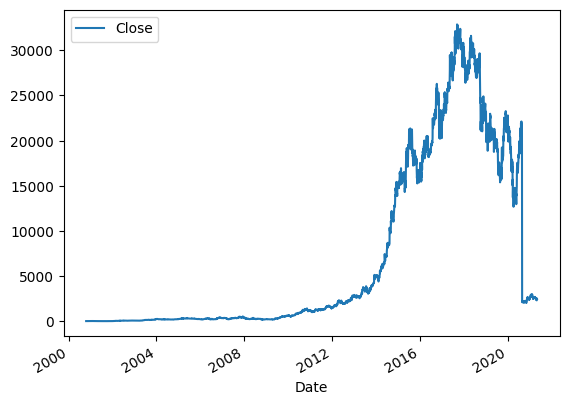

In [493]:
my_data.plot()

In [494]:
std_log=my_data.rolling(window=4).std()

In [495]:
mean_log=my_data.rolling(window=4).mean()

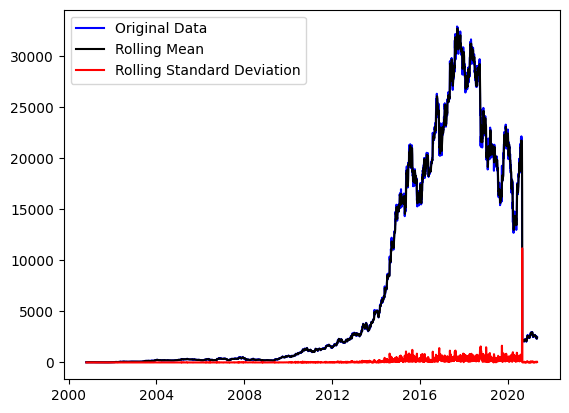

In [496]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [497]:
from statsmodels.tsa.stattools  import adfuller

In [498]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [499]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-1.3835300388988785
p_value:0.5901460617130259
num_lags:0
num_observations:5100
critical_values:{'1%': -3.4316328616522527, '5%': -2.862106888575586, '10%': -2.5670717550557476}
AIC:74189.71311242488


In [500]:
import numpy as np

In [501]:
first_log=np.log(my_data)

In [502]:
first_log.dropna()

,Close
Date,
2000-10-19,3.133318
2000-10-20,3.154870
2000-10-23,3.131137
2000-10-24,3.117950
2000-10-25,3.184284
...,...
2021-04-23,7.748158
2021-04-26,7.770582
2021-04-27,7.783266


<Axes: xlabel='Date'>

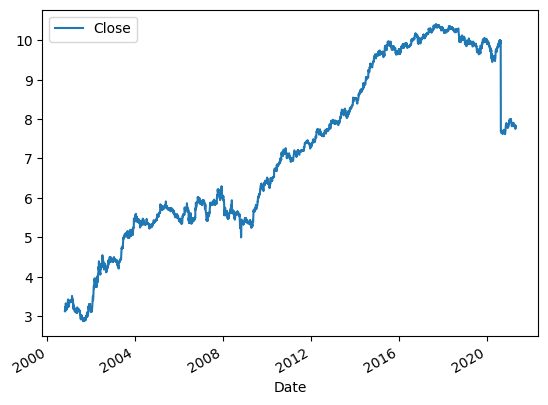

In [503]:
first_log.plot()

In [504]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

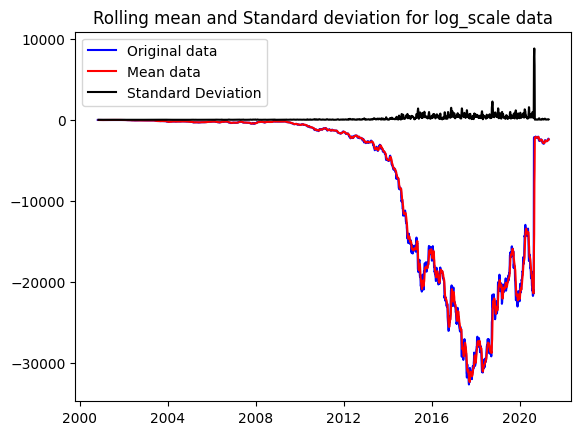

In [505]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [506]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-19.857050
2000-10-25,-20.090716
...,...
2021-04-23,-2333.626842
2021-04-26,-2333.479418
2021-04-27,-2348.491734


In [507]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

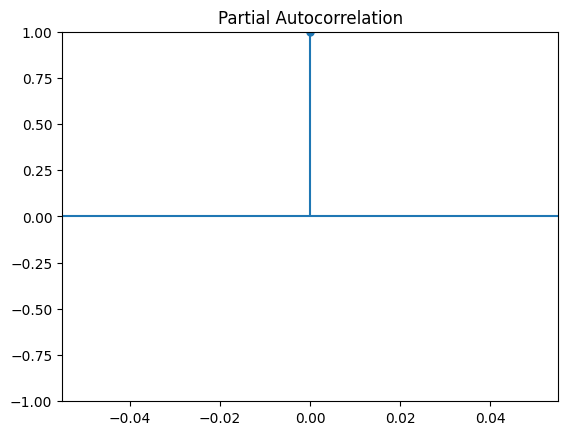

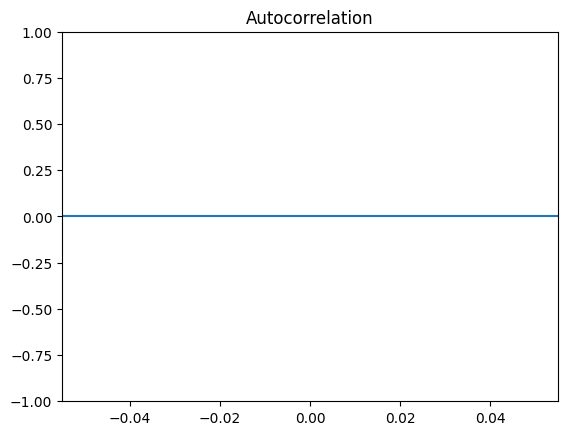

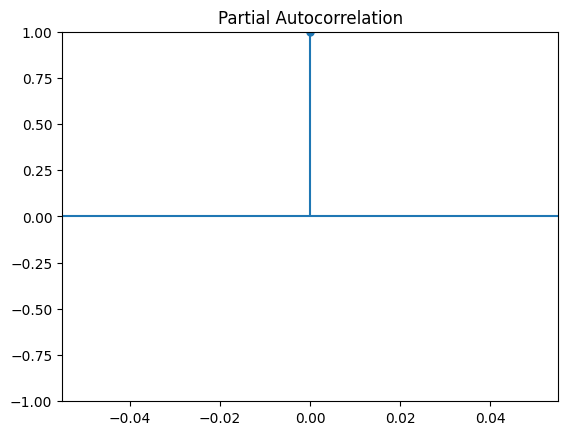

In [508]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [509]:
from statsmodels.tsa.arima.model import ARIMA

In [510]:
train=new_df.iloc[:120]['Close']

In [511]:
test=new_df.iloc[120:]

In [512]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [513]:
model_fit=model.fit()

In [514]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -871.709
Date:                Sat, 07 Dec 2024   AIC                           1753.417
Time:                        09:10:10   BIC                           1767.355
Sample:                             0   HQIC                          1759.077
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.577e+04    680.648     23.166      0.000    1.44e+04    1.71e+04
ar.L1          0.9407      0.045     20.717      0.000       0.852       1.030
ma.L1          0.2448      0.101      2.431      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

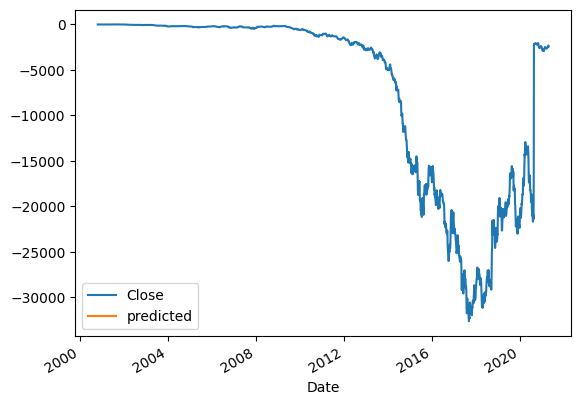

In [515]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [516]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [517]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('No

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

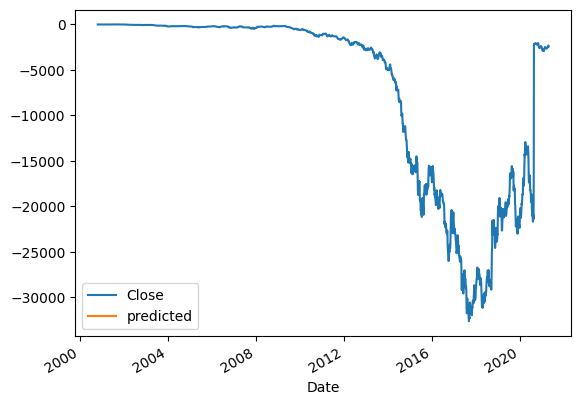

In [518]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


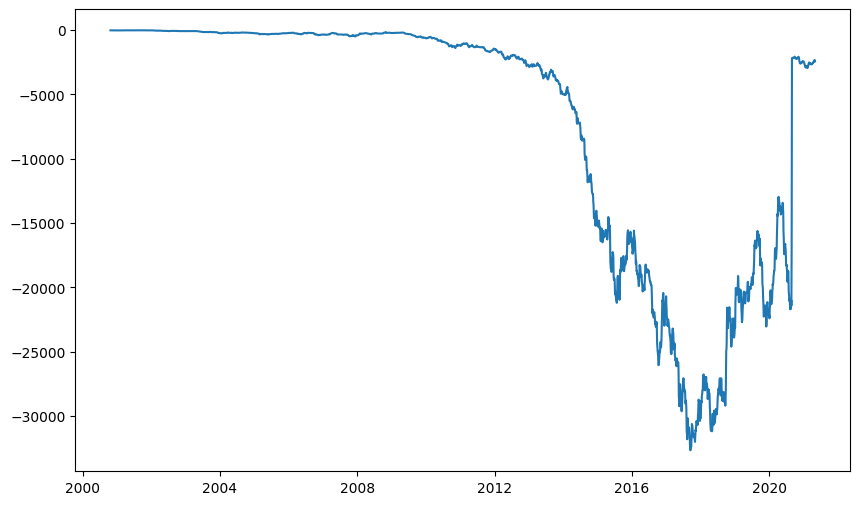

In [519]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

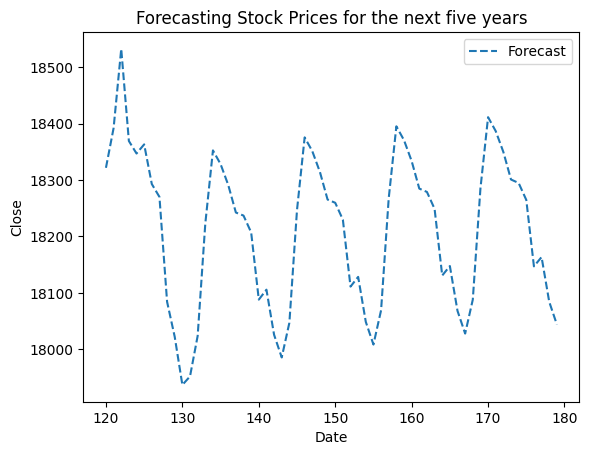

In [520]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()